In [1]:
import os
import pandas as pd
import numpy as np
import matlplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

In [102]:
annodir = 'new_data/tarun/text'
outdir = 'output/tarun/text'

In [184]:
true_pos = 0
false_pos = 0
false_neg = 0
true_neg = 0
image = pd.DataFrame(columns=['image','precision','recall'])
for filename in os.listdir('output/tarun/text'):
    boolean = False
    annotated_file = open(os.path.join(annodir,filename),'r').read()
    output_file = open(os.path.join(outdir,filename),'r').read()
    a = output_file.strip().split('\n')
    b = annotated_file.strip().split('\n')
    if len(a) == 1:
        false_neg += 1
    else:
        for y in a[1:]:
            y = np.array(y.strip().split()).astype(int)
            boolean = False
            for x in b[1:]:
                x = np.array(x.strip().split()).astype(int)
                flag1 = y[0] in range(x[0]-10,x[0]+10,1)
                flag2 = y[1] in range(x[1]-10,x[1]+10,1)
                flag3 = y[2] in range(x[2]-10,x[2]+10,1)
                flag4 = y[3] in range(x[3]-10,x[3]+10,1)
                if flag1 and flag2 and flag3 and flag4:
                    boolean = True
                    true_pos += 1
                    break
            if not boolean:
                false_pos += 1
    image = image.append(pd.DataFrame({
        'image': re.sub('.txt','',filename),
        'precision': true_pos/(true_pos+false_pos),
        'recall': true_pos/(true_pos+false_neg)
    },index=[0]))

In [197]:
image = image.reset_index(drop=True)
image = image.sort_values(by=['precision','recall'],ascending=False)

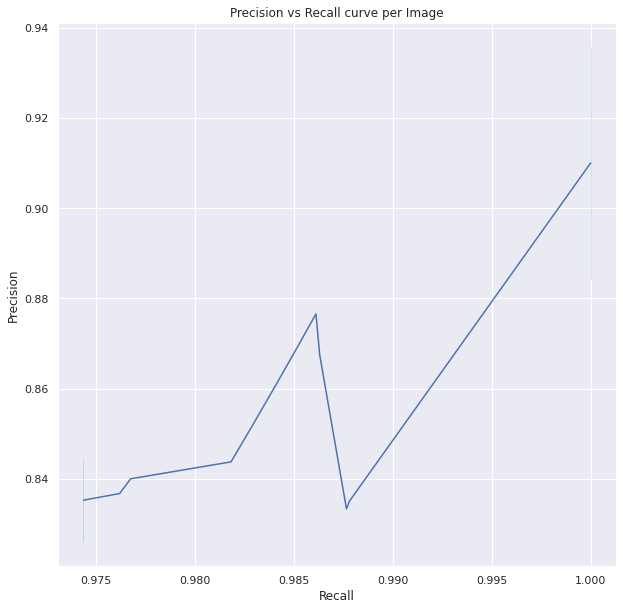

In [200]:
fig,axs = plt.subplots(figsize=(10,10))
sns.lineplot(image['recall'],image['precision'],ax=axs,sort=True)
axs.set_title('Precision vs Recall curve per Image')
axs.set_xlabel('Recall')
axs.set_ylabel('Precision')
fig.savefig('curve.png')

In [149]:
print('Average Precision: {}\nAverage Recall: {}'.format(np.mean(image['precision']),np.mean(image['recall'])))

Average Precision: 0.8839453882779954
Average Recall: 0.9922632398415792
